**Practica 4**

Victor Jahaziel Garza Muñoz 2001180


In [71]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize # para algoritmo de optimización

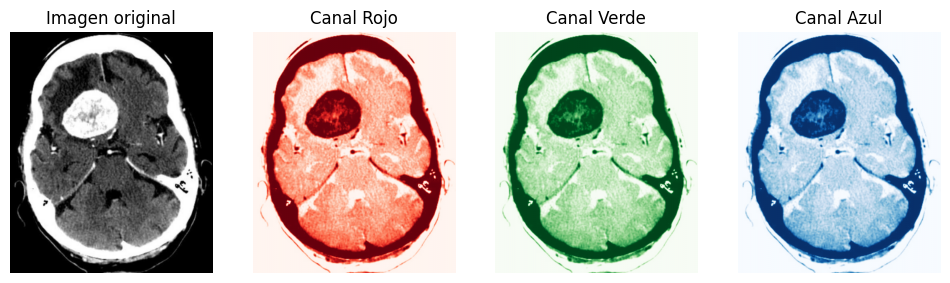

In [72]:
# Cargar imagen a color
img = cv2.imread('Te-me_0015.jpg')  # Cambia 'imagen.jpg' por la ruta de tu imagen
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convertir de BGR (OpenCV) a RGB

# Separar canales
R, G, B = img_rgb[:, :, 0], img_rgb[:, :, 1], img_rgb[:, :, 2]

# Mostrar los canales por separado
plt.figure(figsize=(12, 4))
plt.subplot(1, 4, 1)
plt.imshow(img_rgb)
plt.title('Imagen original')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(R, cmap='Reds')
plt.title('Canal Rojo')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(G, cmap='Greens')
plt.title('Canal Verde')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(B, cmap='Blues')
plt.title('Canal Azul')
plt.axis('off')
plt.show()

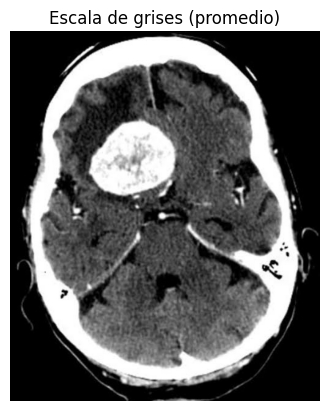

In [73]:
# Convertir a escala de grises promediando canales
gray_avg = ((R.astype(np.float32) + G + B) / 3).astype(np.uint8)

# Mostrar imagen en escala de grises
plt.imshow(gray_avg, cmap='gray')
plt.title('Escala de grises (promedio)')
plt.axis('off')
plt.show()

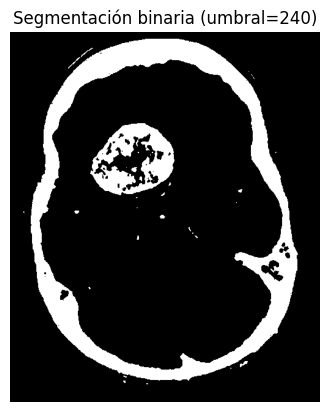

In [88]:
# Umbral para segmentación
umbral = 240
_,segmentada = cv2.threshold(gray_avg, umbral, 255, cv2.THRESH_BINARY)

# Mostrar imagen segmentada
plt.imshow(segmentada, cmap='gray')
plt.title(f'Segmentación binaria (umbral={umbral})')
plt.axis('off')
plt.show()

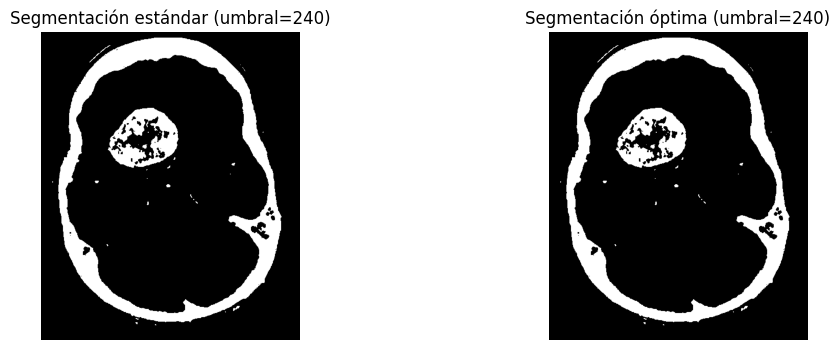

In [89]:

# Segmentar ambas imágenes con un mismo umbral
umbral = 240
_, seg_standard = cv2.threshold(gray_avg, umbral, 255, cv2.THRESH_BINARY)
_, seg_optimal = cv2.threshold(gray_optimal, umbral, 255, cv2.THRESH_BINARY)

# Mostrar resultado
# Imagen obtenida de manera directa o sencilla
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.imshow(seg_standard, cmap='gray')
plt.title(f'Segmentación estándar (umbral={umbral})')
plt.axis('off')

# Imagen obtenida de manera óptima
plt.subplot(1, 2, 2)
plt.imshow(seg_optimal, cmap='gray')
plt.title(f'Segmentación óptima (umbral={umbral})')
plt.axis('off')
plt.show()

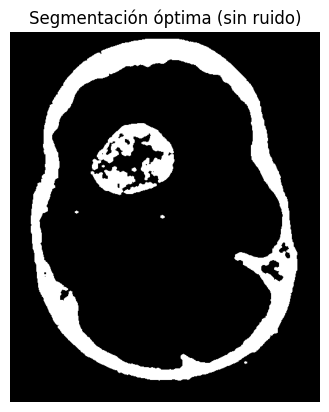

In [99]:
# Aplicar operaciones morfológicas para eliminar ruido
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
seg_opt_clean = cv2.morphologyEx(seg_optimal, cv2.MORPH_OPEN, kernel)

# Mostrar imagen segmentada limpia
plt.imshow(seg_opt_clean, cmap='gray')
plt.title('Segmentación óptima (sin ruido)')
plt.axis('off')
plt.show()

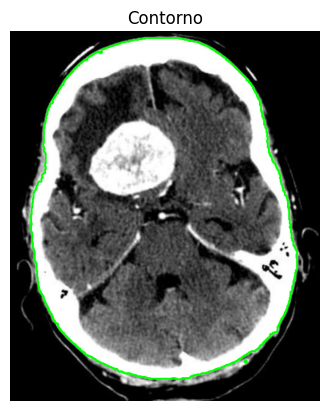

In [102]:
# Encontrar contornos
contornos, _ = cv2.findContours(seg_opt_clean, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


# Dibujar contornos sobre una copia de la imagen original
img_contornos = img_rgb.copy()
cv2.drawContours(img_contornos, contornos, -1, (0, 255, 0), 2)


# Mostrar imagen con contornos
plt.imshow(img_contornos)
plt.title('Contorno')
plt.axis('off')
plt.show()


In [98]:
# Calcular áreas de cada contorno
areas = [cv2.contourArea(c) for c in contornos]

# Mostrar áreas encontradas
print("Áreas encontradas:", areas)

# El tumor es el contorno con el segundo área más grande
if len(areas) > 1:
    sorted_areas = sorted(zip(areas, contornos), key=lambda x: x[0], reverse=True)
    tumor_area = sorted_areas[1][0]
else:
    tumor_area = areas[0]

print("Área del tumor (en píxeles):", tumor_area)


Áreas encontradas: [10.0, 193121.5]
Área del tumor (en píxeles): 10.0
